<a href="https://colab.research.google.com/github/JGrant3101/ME4MachineLearning/blob/main/Tutorial10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the libraries we might need and setting the random seed to 0
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import numpy as np
import sklearn
import math
from sklearn import decomposition
from sklearn import datasets
from sklearn import model_selection
from sklearn import naive_bayes
from sklearn import linear_model
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.neighbors import KernelDensity
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
import pandas
import plotly.graph_objects as go
import sys
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *

# Setting random seed to 0
np.random.seed(0)

Dataset 1

In [2]:
# Start by importing the dataset
dataset1 = pandas.read_csv("http://pogo.software/me4ml/slip_data.csv")
# Assigning data, three of the inputs will be ignored as they are constant for every different value of f2 and f2angle
f2 = np.array(dataset1['f2'][:])
f2ang = np.array(dataset1['f2ang'][:])
# This is the output
slips = np.array(dataset1['slips'][:])
# Converting the slips array to a binary
slips_binary = to_categorical(slips)

# Going to scale the two inputs
f2mean = np.mean(f2)
f2angmean = np.mean(f2ang)
f2std = np.std(f2)
f2angstd = np.std(f2ang)

f2scaled = (f2 - f2mean)/f2std
f2angscaled = (f2ang - f2angmean)/f2angstd

# Putting the inputs all into 1 input array
Inputs1 = np.zeros((1000, 2))
Inputs1[:, 0] = f2scaled
Inputs1[:, 1] = f2angscaled

Above the input array has been created that will be patsed into the neural network

In [3]:
# Initialising the neural network
model1 = Sequential()

# Adding layers, these are pre defined in the tutorial sheet
model1.add(Dense(units = 4, activation = 'tanh', input_dim = 2))
model1.add(Dense(units = 2, activation = 'softmax'))

# Compiling the model
model1.compile(loss = 'categorical_crossentropy', optimizer = 'Adam')
# Fitting the model
model1.fit(Inputs1, slips_binary, epochs = 1200, batch_size = 20)

Epoch 1/1200
50/50 [==============================] - 1s 2ms/step - loss: 0.7633
Epoch 2/1200
50/50 [==============================] - 0s 2ms/step - loss: 0.6981
Epoch 3/1200
50/50 [==============================] - 0s 3ms/step - loss: 0.6415
Epoch 4/1200
50/50 [==============================] - 0s 2ms/step - loss: 0.5914
Epoch 5/1200
50/50 [==============================] - 0s 2ms/step - loss: 0.5468
Epoch 6/1200
50/50 [==============================] - 0s 2ms/step - loss: 0.5095
Epoch 7/1200
50/50 [==============================] - 0s 2ms/step - loss: 0.4814
Epoch 8/1200
50/50 [==============================] - 0s 2ms/step - loss: 0.4611
Epoch 9/1200
50/50 [==============================] - 0s 2ms/step - loss: 0.4471
Epoch 10/1200
50/50 [==============================] - 0s 2ms/step - loss: 0.4376
Epoch 11/1200
50/50 [==============================] - 0s 2ms/step - loss: 0.4313
Epoch 12/1200
50/50 [==============================] - 0s 2ms/step - loss: 0.4266
Epoch 13/1200
50/50 [====

Above the neural network has been created and trained as suggested in the tutorial sheet

In [14]:
# Plotting results for the ranges specified in the question
f2plot = np.linspace(0, 40, 401)
f2angplot = np.linspace(0, 360, 3601)

# Creating the mesh grid
x1mesh, x2mesh = np.meshgrid(f2plot, f2angplot)
Xgrid = np.array([x1mesh, x2mesh]).reshape([2, 401*3601]).T

# Predicting for the meshgrid
model1results = model1.predict(Xgrid)

45126/45126 [==============================] - 165s 4ms/step


Above we have generated all the points we want to predict for and then predicted if they will slip or not using the neural network

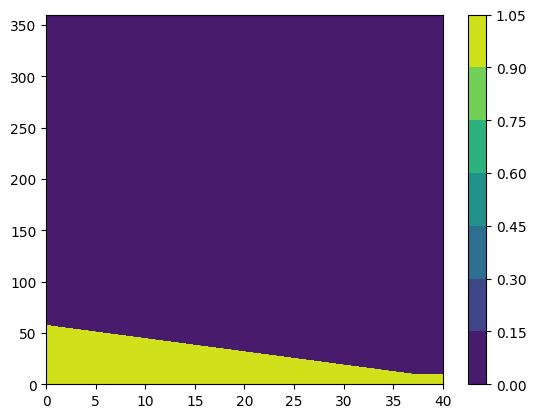

In [29]:
# Converting our output to binary
model1resultsbinary = np.zeros([len(model1results[:,0])])
for i in range(len(model1results[:, 0])):
  if (model1results[i, 0] < model1results[i, 1]):
    model1resultsbinary[i] = 1
  else:
    model1resultsbinary[i] = 0

# Reshaping the binary result
model1resultsbinaryreshape = np.reshape(model1resultsbinary, [3601, 401])

# Plotting
fig1, ax1 = plt.subplots()
plt.contourf(f2plot, f2angplot, model1resultsbinaryreshape)
plt.colorbar()